<a href="https://colab.research.google.com/github/fhsantino/P2_Ecommerce/blob/main/Case_Ecommerce_Git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução #

Case de análise exploratória de dados (E.D.A) dos dados de venda de uma loja online (E-Commerce) 

In [ ]:
# Inicialização
import pandas as pd
import numpy as np
import matplotlib as plt

## Case VAI Store ##

1 - Importação dos dados

In [ ]:
# Origem do Tráfego -> CSV
df1 = pd.read_csv("ORIGEM_TRAFEGO.csv", sep=';')
df1.head()

,PEDIDO_ERP,CANAL_MARKETING
0,P10000123123,Google Ads
1,P10000123124,Facebook Ads
2,P10000123125,Email
3,P10000123126,Direto
4,P10000123127,Busca orgânica


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172031 entries, 0 to 172030
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   PEDIDO_ERP       172031 non-null  object
 1   CANAL_MARKETING  151600 non-null  object
dtypes: object(2)
memory usage: 2.6+ MB


# Etapa 1 #
##Análise da distribuição da origem do tráfego##

## Gasto com Mídia ##

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving GastoMidia2.xls to GastoMidia2.xls


In [ ]:
import io
df2 = pd.read_excel(io.BytesIO(uploaded['GastoMidia2.xls']))
df2

,Dia,Facebook Ads,Google Ads
0,2020-01-01,NaN,987.46
1,2020-01-02,NaN,1165.32
2,2020-01-03,NaN,876.76
3,2020-01-04,NaN,804.85
4,2020-01-05,NaN,899.13
...,...,...,...
451,2021-03-27,350.57,778.54
452,2021-03-28,371.65,994.93
453,2021-03-29,306.72,894.11
454,2021-03-30,303.54,651.89


# Pedidos dos Clientes ##


# Análise #

## Receita e margem de cliente em cada canal ##




In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296937 entries, 0 to 296936
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   DATA_VENDA          296937 non-null  object 
 1   PEDIDO              296937 non-null  int64  
 2   PEDIDO_ERP          296937 non-null  object 
 3   COD_CLIENTE         296937 non-null  int64  
 4   PRODUTO             296937 non-null  object 
 5   QTDE                296937 non-null  int64  
 6   PRECO_UNITARIO      296937 non-null  float64
 7   DESCONTO_ITEM       296937 non-null  float64
 8   FRETE_PAGO_CLIENTE  296937 non-null  float64
 9   RECEITA             296937 non-null  float64
 10  CUSTO_FRETE         296937 non-null  float64
 11  CANAL_MARKETING     255684 non-null  object 
 12  CUSTO_MERCADORIA    296937 non-null  float64
 13  LINHA_PRODUTO       290281 non-null  object 
dtypes: float64(6), int64(3), object(5)
memory usage: 34.0+ MB


In [ ]:
df5.sort_values('MARGEM', ascending=False)

,DATA_VENDA,PEDIDO,PEDIDO_ERP,COD_CLIENTE,PRODUTO,QTDE,PRECO_UNITARIO,DESCONTO_ITEM,FRETE_PAGO_CLIENTE,RECEITA,CUSTO_FRETE,CANAL_MARKETING,CUSTO_MERCADORIA,LINHA_PRODUTO,MARGEM
261993,2020-11-27 00:00:00.000000,7133102,P10000255665,4094103,E10682Y,89,89.9,0.0,0.00,8001.10,11.69,NaN,24.19,BOLSAS,222.996098
125581,2020-05-07 00:00:00.000000,7027332,P10000150018,4121271,E10047Y,45,59.9,-135.0,0.00,2560.50,7.79,Direto,11.65,BASICO,131.712963
125872,2020-09-22 00:00:00.000000,7098455,P10000220969,4050562,E10047Y,41,59.9,0.0,0.00,2455.90,7.79,Google Ads,11.65,BASICO,126.332305
71134,2020-11-21 00:00:00.000000,7124953,P10000247493,4120248,E10490Y,50,59.9,0.0,0.00,2995.00,7.79,Google Ads,16.13,FASHION,125.209030
27842,2020-12-06 00:00:00.000000,7140966,P10000263429,4045342,E10203Y,20,29.9,0.0,0.00,598.00,0.00,Google Ads,4.86,BASICO,123.045267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47036,2020-05-14 00:00:00.000000,7032569,P10000155281,4029988,E10470Y,1,99.9,-99.9,2.14,2.14,2.14,Outros,23.33,BASICO,0.084020
47483,2020-07-16 00:00:00.000000,7075615,P10000198163,4118190,E10470Y,1,99.9,-99.9,2.05,2.05,2.05,NaN,23.33,BASICO,0.080772
46920,2020-05-03 00:00:00.000000,7023577,P10000146276,4033630,E10470Y,1,99.9,-99.9,2.01,2.01,2.01,Google Ads,23.33,BASICO,0.079321
280754,2021-01-20 00:00:00.000000,7160956,P10000283295,4097858,E10717Y,1,159.9,-159.9,1.84,1.84,1.84,Direto,26.17,ACESSORIOS,0.065691


# Visão Geral #

Foi percebido um aumento substancial das vendas no e-commerce no
segundo trimestre de 2020. Analise a evolução do faturamento ao longo
dos meses.


1. A fim de encontrar a evolução do faturamento ao longo dos meses, vamos plotar um gráfico com o valor da receita (soma diária) ao longo do tempo

In [ ]:
# Preparando os dados -> Convertendo o formato das datas

# Convertendo as datas do DF para o formato de datas
datetimes =  pd.to_datetime(df5['DATA_VENDA'])
df5['DATA_VENDA'] = datetimes
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296937 entries, 0 to 296936
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   DATA_VENDA          296937 non-null  datetime64[ns]
 1   PEDIDO              296937 non-null  int64         
 2   PEDIDO_ERP          296937 non-null  object        
 3   COD_CLIENTE         296937 non-null  int64         
 4   PRODUTO             296937 non-null  object        
 5   QTDE                296937 non-null  int64         
 6   PRECO_UNITARIO      296937 non-null  float64       
 7   DESCONTO_ITEM       296937 non-null  float64       
 8   FRETE_PAGO_CLIENTE  296937 non-null  float64       
 9   RECEITA             296937 non-null  float64       
 10  CUSTO_FRETE         296937 non-null  float64       
 11  CANAL_MARKETING     255684 non-null  object        
 12  CUSTO_MERCADORIA    296937 non-null  float64       
 13  LINHA_PRODUTO       290281 no

In [ ]:
df5.head()

,DATA_VENDA,PEDIDO,PEDIDO_ERP,COD_CLIENTE,PRODUTO,QTDE,PRECO_UNITARIO,DESCONTO_ITEM,FRETE_PAGO_CLIENTE,RECEITA,CUSTO_FRETE,CANAL_MARKETING,CUSTO_MERCADORIA,LINHA_PRODUTO,MARGEM
0,2020-01-01,7000001,P10000123123,4040690,E10505Y,1,149.9,0.0,32.32,182.22,32.32,Google Ads,45.1,ACESSORIOS,2.353655
1,2020-01-03,7000241,P10000123366,4107070,E10505Y,1,149.9,0.0,18.57,168.47,18.57,Busca orgânica,45.1,ACESSORIOS,2.645987
2,2020-01-07,7000720,P10000123827,4119511,E10505Y,1,149.9,0.0,0.00,149.90,0.00,Direto,45.1,ACESSORIOS,3.323725
3,2020-01-08,7000850,P10000123964,4120650,E10505Y,1,149.9,0.0,0.00,149.90,19.49,Google Ads,45.1,ACESSORIOS,2.320793
4,2020-01-08,7000965,P10000124072,4100635,E10505Y,1,149.9,0.0,0.00,149.90,19.49,Direto,45.1,ACESSORIOS,2.320793


In [ ]:
# Agrupando a soma de Receita total por dia
dayrevenue = df5.groupby('DATA_VENDA')['RECEITA'].sum()
print(dayrevenue)

DATA_VENDA
2020-01-01     9826.02
2020-01-02    22666.51
2020-01-03    20889.51
2020-01-04    20535.24
2020-01-05    19199.23
                ...   
2021-03-06    30154.23
2021-03-07    38217.02
2021-03-08    47852.48
2021-03-09    52287.29
2021-03-10    44394.82
Name: RECEITA, Length: 435, dtype: float64



 ---> Valor do faturamento ao longo do tempo 



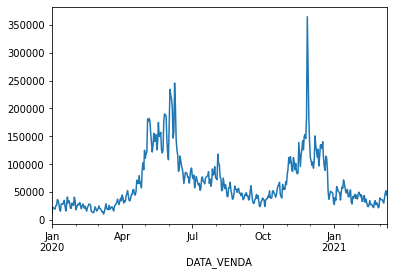

In [ ]:
# Plotando o gráfico do faturamento total por dia em função do tempo
print('\n ---> Valor do faturamento ao longo do tempo \n')
dayrevenue.plot()

## Análise ##

Observa-se que há um aumento substancial nas vendas entre a metade do mês de abril até a metade do mês de julho, mas ainda assim há a continuidade de um faturamento acima da média anterior dos meses de julho até meados de setembro.
Neste caso, a hipótese apresentada é confirmada. Ao longo do tempo, também é possível notar um aumento no faturamento entre novembro de 2020 e janeiro de 2021.
(Causa? -> Compras de final de ano, lançamento de um novo produto)

# Novos Clientes #

1. Análise do número de clientes ativos mês a mês

2. Análise dos canais de marketing


 --> Contagem da origem de tráfego por canal de marketing 

Google Ads        60935
Busca orgânica    28287
Direto            17270
Facebook Ads      14780
Referência        10890
Outros            10065
Email              9373
Name: CANAL_MARKETING, dtype: int64

 --> Gráfico da distribuição 



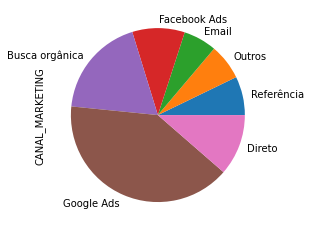

In [ ]:
# Canais de marketing (DF1: Dataframe contendo a origem do tráfego)
# Contagem da origem do tráfego por canais de marketing
v1 = df1['CANAL_MARKETING'].value_counts()
print('\n --> Contagem da origem de tráfego por canal de marketing \n')
print(v1)
# Plot
print('\n --> Gráfico da distribuição \n')
df1.CANAL_MARKETING.value_counts(sort=False).plot.pie()

Pelos dados apresentados da origem do tráfego, é possível notar que o canal de marketing que mais gerou acessos na plataforma é o Google Ads, seguido pela busca orgânica

Porém, para maior confiabilidade, é necessário avaliar quais desses tráfegos foram convertidos em faturamento real para a empresa.

Etapas:
1. É necessário "juntar" as informações de origem dos visitantes com o valor gasto em cada canal.

Então, analisando a base de dados de clientes (SQL)


In [ ]:
# primeiro importamos a função create_engine de sqlalchemy
import sqlalchemy

# entao criamos a engine passando a string de conexão
engine_str = 'sqlite:///vaistore.sqlite'
engine = sqlalchemy.create_engine(engine_str)

# já temos a engine! Vamos ver as tableas em um DB 
table_names = sqlalchemy.inspect(engine).get_table_names()
print(table_names)

['info_produto', 'pedidos']


In [ ]:
# utiliza o pandas read_sql_query para ler o resultado da query como dataframe
df3 = pd.read_sql_query("SELECT * FROM pedidos", engine)
df3.head()
# Criado o DF3, contendo os resultados dos pedidos dos clientes

,DATA_VENDA,PEDIDO,PEDIDO_ERP,COD_CLIENTE,PRODUTO,QTDE,PRECO_UNITARIO,DESCONTO_ITEM,FRETE_PAGO_CLIENTE,RECEITA,CUSTO_FRETE
0,2020-01-01 00:00:00.000000,7000001,P10000123123,4040690,E10505Y,1,149.9,0.00,32.32,182.22,32.32
1,2020-01-01 00:00:00.000000,7000003,P10000123124,4003939,E10513Y,1,189.9,0.00,0.00,189.90,0.00
2,2020-01-01 00:00:00.000000,7000006,P10000123128,4043259,E10375Y,1,129.9,-12.99,26.93,143.84,26.93
3,2020-01-01 00:00:00.000000,7000009,P10000123132,4090303,E10477Y,2,19.9,0.00,0.00,39.80,0.00
4,2020-01-01 00:00:00.000000,7000011,P10000294585,4080417,E10058Y,1,189.9,1.17,27.57,218.64,27.57


In [ ]:
df4 = pd.read_sql_query("SELECT * FROM info_produto", engine)
df4.head()
# Também criamos o DF4, a partir do arquivo SQL a fim de ter o custo da mercadoria para analises posteriores

,PRODUTO,CUSTO_MERCADORIA,LINHA_PRODUTO
0,A10001G,21.1,BASICO
1,A10002M,21.1,BASICO
2,A10003M,22.6,BASICO
3,A10004P,22.6,BASICO
4,A10005M,22.6,BASICO


In [ ]:
# Criando um novo DF para adicionar a origem de cada venda através do código ERP
df5 = pd.merge(df3, df1, how='inner', on='PEDIDO_ERP')

# Adicionando o custo de cada produto ao DF5 para depois calcular a margem
df5 = pd.merge(df5, df4, how='inner', on='PRODUTO')
# Multiplicando o custo pela quantidade de mercadorias
df5['CUSTO_MERCADORIA_TOT'] = df5['CUSTO_MERCADORIA'] * df5['QTDE']
# Visualização do novo DF com as novas informações para a análise
df5.sort_values('QTDE', ascending=False)

,DATA_VENDA,PEDIDO,PEDIDO_ERP,COD_CLIENTE,PRODUTO,QTDE,PRECO_UNITARIO,DESCONTO_ITEM,FRETE_PAGO_CLIENTE,RECEITA,CUSTO_FRETE,CANAL_MARKETING,CUSTO_MERCADORIA,LINHA_PRODUTO,CUSTO_MERCADORIA_TOT
195950,2020-11-14 00:00:00.000000,7118877,P10000241404,4046694,E10451Y,100,19.9,0.0,0.00,1990.00,2.59,NaN,27.13,BASICO,2713.00
85532,2020-05-11 00:00:00.000000,7030055,P10000152732,4024278,E10369Y,94,9.9,0.0,0.00,930.60,1.29,Google Ads,17.05,ACESSORIOS,1602.70
261993,2020-11-27 00:00:00.000000,7133102,P10000255665,4094103,E10682Y,89,89.9,0.0,0.00,8001.10,11.69,NaN,24.19,BOLSAS,2152.91
169715,2020-11-02 00:00:00.000000,7109220,P10000231748,4055110,E10394Y,70,9.9,0.0,0.00,693.00,1.29,NaN,8.69,FASHION,608.30
260914,2020-11-05 00:00:00.000000,7112027,P10000234559,4007735,B10175,63,19.9,0.0,0.00,1253.70,2.59,Google Ads,8.28,FASHION,521.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101027,2020-11-23 00:00:00.000000,7127451,P10000249922,4014939,E10547Y,1,39.9,0.0,0.00,39.90,5.19,NaN,12.54,FASHION,12.54
101028,2020-11-23 00:00:00.000000,7127456,P10000249927,4111033,E10547Y,1,39.9,0.0,12.90,52.80,12.90,Direto,12.54,FASHION,12.54
101029,2020-11-23 00:00:00.000000,7127457,P10000249928,4037368,E10547Y,1,39.9,0.0,0.00,39.90,0.00,Direto,12.54,FASHION,12.54
101031,2020-11-23 00:00:00.000000,7127467,P10000249938,4082034,E10547Y,1,39.9,0.0,0.00,39.90,0.00,Email,12.54,FASHION,12.54


In [ ]:
# Encontrando os resultados (receitas) de vendas em cada canal
print('\n --> Receita por clientes em cada canal \n')
info = df5.groupby('CANAL_MARKETING')['RECEITA'].sum() 
print(info)


 --> Receita por clientes em cada canal 

CANAL_MARKETING
Busca orgânica    4.722539e+06
Direto            2.963370e+06
Email             1.773147e+06
Facebook Ads      2.251013e+06
Google Ads        1.026167e+07
Outros            1.581049e+06
Referência        1.788930e+06
Name: RECEITA, dtype: float64



 --> Receita por canal de marketing 
 



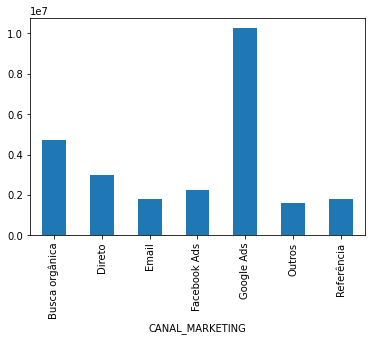

In [ ]:
# Receita de cada cliente por canal de marketing 
print('\n --> Receita por canal de marketing \n \n')
info.plot.bar()

É possível observar que a maior parte do faturamento vem de clientes que chegaram até a plataforma de venda utilizando o Google Ads

-> Para analisar a margem de cada canal, é necessário criar uma coluna com os custos de cada produto em cada pedido

Neste caso, a margem é definida como:

MARGEM = ( ( RECEITA / (CUSTO MERCADORIA + CUSTO FRETE) -1 ) * 100 

In [ ]:
# Criando uma nova coluna de margem (Recebidos / Pagos) por produto
df5['MARGEM_PERCENT'] =( df5['RECEITA'] / (df5['CUSTO_MERCADORIA_TOT'] + df5['CUSTO_FRETE']) -1 )* 100
df5.head()

,DATA_VENDA,PEDIDO,PEDIDO_ERP,COD_CLIENTE,PRODUTO,QTDE,PRECO_UNITARIO,DESCONTO_ITEM,FRETE_PAGO_CLIENTE,RECEITA,CUSTO_FRETE,CANAL_MARKETING,CUSTO_MERCADORIA,LINHA_PRODUTO,CUSTO_MERCADORIA_TOT,MARGEM_PERCENT
0,2020-01-01 00:00:00.000000,7000001,P10000123123,4040690,E10505Y,1,149.9,0.0,32.32,182.22,32.32,Google Ads,45.1,ACESSORIOS,45.1,135.365539
1,2020-01-03 00:00:00.000000,7000241,P10000123366,4107070,E10505Y,1,149.9,0.0,18.57,168.47,18.57,Busca orgânica,45.1,ACESSORIOS,45.1,164.598712
2,2020-01-07 00:00:00.000000,7000720,P10000123827,4119511,E10505Y,1,149.9,0.0,0.00,149.90,0.00,Direto,45.1,ACESSORIOS,45.1,232.372506
3,2020-01-08 00:00:00.000000,7000850,P10000123964,4120650,E10505Y,1,149.9,0.0,0.00,149.90,19.49,Google Ads,45.1,ACESSORIOS,45.1,132.079269
4,2020-01-08 00:00:00.000000,7000965,P10000124072,4100635,E10505Y,1,149.9,0.0,0.00,149.90,19.49,Direto,45.1,ACESSORIOS,45.1,132.079269


Então, repetindo a análise dos canaris de marketing porém considerando agora a margem de lucro ao invés do faturamento, temos:


 --> Margem (%) média por clientes em cada canal 

CANAL_MARKETING
Busca orgânica    4.722539e+06
Direto            2.963370e+06
Email             1.773147e+06
Facebook Ads      2.251013e+06
Google Ads        1.026167e+07
Outros            1.581049e+06
Referência        1.788930e+06
Name: RECEITA, dtype: float64

 --> Margem média por canal de marketing 
 



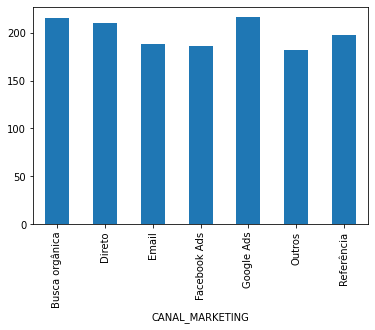

In [ ]:
# Margem média de lucros obtida nas vendas através de cada canal
print('\n --> Margem (%) média por clientes em cada canal \n')
info2 = df5.groupby('CANAL_MARKETING')['MARGEM_PERCENT'].mean() 
print(info)

# Margem de cada cliente por canal de marketing 
print('\n --> Margem média por canal de marketing \n \n')
info2.plot.bar()

In [ ]:
# Análise do gasto com mídia 
import io
df2 = pd.read_excel(io.BytesIO(uploaded['GastoMidia2.xls']))
df2.info()

totalfacebook = df2['Facebook Ads'].sum()
totalgoogle = df2['Google Ads'].sum()
print('\n -> Gasto total com o Facebook Ads:')
print(totalfacebook)
print('\n -> Gasto total com o Google Ads:')
print(totalgoogle)
print('\n -> Face / Google %:')
print((totalfacebook/totalgoogle -1) *100)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Dia           456 non-null    datetime64[ns]
 1   Facebook Ads  410 non-null    float64       
 2   Google Ads    456 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 10.8 KB

 -> Gasto total com o Facebook Ads:
664579.8999999999

 -> Gasto total com o Google Ads:
368904.08999999997

 ->Face / Google %:
80.14977822555448


Nesse caso é possível perceber que a margem média de lucro obtida em cada canal é bastante semelhante sendo, então, o canal de vendas Google Ads o mais rentável para a empresa, considerando que é o canal de vendas com maior participação do faturamento.

Porém, ainda cabe a análise do custo do marketing em cada canal: Neste caso, a hipótese apresentada anteriormente é reforçada: Há um custo significativamente maior de anúncios no Facebook Ads (80% a mais de custos) e os resultados obtidos de tráfego são muito menores (cerca de 20% do tráfego total obtido através do Google Ads).

Também é possível perceber que a busca orgânica (quando o cliente opta por realizar a busca) representa a 2ª maior parcela de participação no faturamento.

O canal Facebook Ads pode apresentar-se como não eficaz na captação de clientes, já que é custoso e oferece um retorno muito baixo quando comparado a outros canais pagos de marketing

# Recorrência #

1. Análise da quantidade de compras por cliente em um determinado periodo

2020-01-01 00:00:00
2021-03-10 00:00:00


 ---> Resultado do DF com média mensal antes e depois do split em 01/12/2020
      COD_CLIENTE  Antes (AVG)  Depois (AVG Mensal)  DIFERENÇA        DIF%
0         4000039     0.363636             1.666667   1.303030  458.333333
1         4000062     0.272727             0.666667   0.393939  244.444444
2         4000116     0.363636             1.666667   1.303030  458.333333
3         4000174     0.363636             1.666667   1.303030  458.333333
4         4000181     0.909091             2.000000   1.090909  220.000000
...           ...          ...                  ...        ...         ...
4856      4146209     0.181818             1.333333   1.151515  733.333333
4857      4146233     0.090909             0.333333   0.242424  366.666667
4858      4146241     0.454545             1.000000   0.545455  220.000000
4859      4146250     0.181818             1.666667   1.484848  916.666667
4860      4146261     0.272727             0.333333   0.

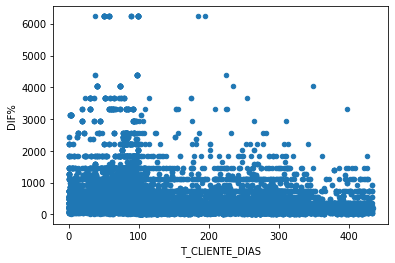

In [ ]:
# Compras por periodo de tempo
print(df5['DATA_VENDA'].min())
print(df5['DATA_VENDA'].max())

# Dividindo DF em 01/12/2020 (Ações de retenção)
import datetime
split_date = datetime.date(2020,12,1)

df5["DATA_VENDA"]= pd.to_datetime(df5["DATA_VENDA"])

antes = df5[df5["DATA_VENDA"].dt.date < split_date]
depois = df5[df5["DATA_VENDA"].dt.date >= split_date]
# DF com dados de compras antes da data split
df10 = antes.groupby('COD_CLIENTE')['DATA_VENDA'].count()\
        .reset_index(name="Antes (AVG)")
#df10.sort_values(ascending=False)
# DF com dados de compras depois de split date
df11 = depois.groupby('COD_CLIENTE')['DATA_VENDA'].count()\
        .reset_index(name="Depois (AVG Mensal)")

#df11.sort_values(ascending=False)
# Merge com os DFs
df12 = pd.merge(df10, df11, on='COD_CLIENTE', how='inner')
# Calcula media mensal de vendas por cliente (Tamanho dos Períodos são diferentes)
# Período 1: Jan - Nov de 2020: Total de 11 meses completos
# Período 2: Dez - Fev 2021: Total 3 meses completos
df12['Antes (AVG)'] = df12['Antes (AVG)']/11
df12['Depois (AVG Mensal)'] = df12['Depois (AVG Mensal)'] / 3
df12['DIFERENÇA'] = df12['Depois (AVG Mensal)'] - df12['Antes (AVG)']
df12['DIF%'] = ( df12['Depois (AVG Mensal)'] / df12['Antes (AVG)'] )* 100
print('\n\n ---> Resultado do DF com média mensal antes e depois do split em 01/12/2020')
print(df12)
print('\n\n A média da quantidade de compras por mês do cliente antes da alteração e depois é de: ')
print(df12['DIFERENÇA'].mean())
print('\n\n Diferença percentual (%) da quantidade de vendas  antes da alteração e depois é de: ')
print(df12['DIF%'].mean())

# Adicionando coluna idade do cliente (Merge com DF5 que tem os dados)
df12 = pd.merge(df12, df5[['DATA_VENDA', 'COD_CLIENTE']], on='COD_CLIENTE', how='inner')
df12['TEMPO_CLIENTE'] = datetime.date(2021,3,10) - df12['DATA_VENDA'].dt.date
print('\n\n --> Adição do tempo do cliente na empresa ')

df12['T_CLIENTE_DIAS'] = df12['TEMPO_CLIENTE'] / np.timedelta64(1, 's')
df12['T_CLIENTE_DIAS'] = df12['T_CLIENTE_DIAS']/86400
del df12['TEMPO_CLIENTE']
del df12['DATA_VENDA']
df12.info()
print('\n\n ---> Aumento % das vendas por tempo de cliente na empresa  ')
df12.plot.scatter(x='T_CLIENTE_DIAS', y='DIF%')


Analisando o resultado dos dados separados por antes e depois das ações de retenção da empresa, é possível notar que a média de compras por mês por cliente aumentou em 0.48 compras mensais, cerca de 420% de aumento na média mensal.

Os resultados das ações de aumento de vendas não parecem ter efetividade em clientes com mais tempos de empresa, tendo em vista que a maior diferença percentual de vendas entre os dois períodos analisados (Antes de 01/12/2020 e depois de 01/12/2020), que representariam os cenários "Antes" e "Depois" das ações da diretoria.
É possível observar no gráfico que o maior aumento foi em clientes que possuem menos de 150 dias da empresa, ou seja, os que foram adquiridos pouco tempo antes do início das ações de retenção.

Mas de qualquer forma, nota-se um resultado efetivo da ação de uma forma geral, com o aumento médio de compras mensais na casa dos 420%.

# Margem #

-> Análise da margem de lucro por produto, a fim de verificar quais são mais rentáveis (Lucro total e margem %) 

In [ ]:
# Separação por produto do lucro total
# 1. Criação de uma coluna com lucro total no DF
df5['LUCRO'] = df5['RECEITA'] - (df5['CUSTO_FRETE'] + df5['CUSTO_MERCADORIA_TOT'])
# 2. Groupby por produto
lucroproduto = df5.groupby('PRODUTO')['LUCRO'].mean()
maislucrativos = lucroproduto.sort_values(ascending=False)
# 3. Convertendo para DF
from pandas import DataFrame
df6 = DataFrame(maislucrativos)

# Adicionando categorias para melhorar a visualização (Merge com DF de categorias)
df7 = pd.merge(df6, df4, on='PRODUTO')

print ('\n --> Análise do lucro médio da empresa para dodos os produtos \n')
df7.describe()


 --> Análise do lucro médio da empresa para dodos os produtos 



,LUCRO,CUSTO_MERCADORIA
count,1681.000000,1681.000000
mean,74.748462,27.787252
std,144.424407,44.747764
min,-13.605985,0.520000
25%,24.083154,8.540000
50%,46.640444,17.200000
75%,90.959107,32.710000
max,4600.320000,898.220000


In [ ]:
# Pedidos com maior lucro médio
print('\n --> Itens com maior lucro médio por venda \n')
df7.head(20)


 --> Itens com maior lucro médio por venda 



,PRODUTO,LUCRO,CUSTO_MERCADORIA,LINHA_PRODUTO
0,E10542Y,4600.320000,858.13,TECH
1,E10561Y,1217.940000,898.22,TECH
2,E10808Y,1153.646207,268.19,ACESSORIOS
3,E10770Y,1105.558750,321.22,BASICO
4,E10026Y,1061.176667,273.74,ACESSORIOS
5,E10922Y,949.065000,172.84,BASICO
6,E10706Y,857.130000,225.63,TECH
7,E10669Y,713.444286,451.89,ACESSORIOS
8,E10797Y,649.410714,138.00,BASICO
9,E10739Y,638.220695,197.53,TECH


In [ ]:
# Itens com menor lucro (ou maior prejuízo)
print('\n --> Itens com menor lucro médio por venda \n')
df7.tail(20)


 --> Itens com menor lucro médio por venda 



,PRODUTO,LUCRO,CUSTO_MERCADORIA,LINHA_PRODUTO
1661,B10129G,0.902991,21.68,BASICO
1662,B10122P,0.652727,23.77,BASICO
1663,B10121M,0.548204,23.77,BASICO
1664,B10124G,-0.439750,23.75,BASICO
1665,D10005,-1.900000,25.68,None
1666,B10066,-2.898935,20.52,BASICO
1667,E10164Y,-2.981763,15.45,FASHION
1668,E10722Y,-3.405206,3.27,FASHION
1669,E10261Y,-4.420000,4.42,BASICO
1670,E10368Y,-6.048885,23.68,ACESSORIOS


Analisando os dados acima, é possível visualizar os 20 produtos com maior lucro médio por venda (Valor Absoluto) bem como os itens com menor lucro médio por venda.

Agora repetindo a análise, porém considerando a margem (%) de lucro

In [ ]:
# Separação por produto do lucro total
# 2. Groupby por produto
lucroproduto2 = df5.groupby('PRODUTO')['MARGEM_PERCENT'].mean()
maislucrativos2 = lucroproduto2.sort_values(ascending=False)
# 3. Convertendo para DF
from pandas import DataFrame
df8 = DataFrame(maislucrativos2)

# Adicionando categorias para melhorar a visualização (Merge com DF de categorias)
df9 = pd.merge(df8, df4, on='PRODUTO')

print ('\n --> Análise da margem média da empresa para dodos os produtos \n')
df9.describe()


 --> Análise da margem média da empresa para dodos os produtos 



,MARGEM_PERCENT,CUSTO_MERCADORIA
count,1681.000000,1681.000000
mean,194.222614,27.787252
std,100.555520,44.747764
min,-39.881442,0.520000
25%,116.138550,8.540000
50%,184.998348,17.200000
75%,267.955801,32.710000
max,541.733547,898.220000


In [ ]:
# Pedidos com maior margem média
print('\n --> Itens com maior margem média % por venda \n')
df9.head(20)


 --> Itens com maior margem média % por venda 



,PRODUTO,MARGEM_PERCENT,CUSTO_MERCADORIA,LINHA_PRODUTO
0,E10923Y,541.733547,31.15,BASICO
1,E10892Y,516.106387,13.69,FASHION
2,E10882Y,507.669816,32.93,BOLSAS
3,E10771Y,500.151640,11.28,TECH
4,E10924Y,496.173284,15.31,BASICO
5,E10897Y,480.964691,5.61,BASICO
6,E10848Y,475.108487,25.08,ACESSORIOS
7,E10757Y,469.630037,16.99,BASICO
8,B10142,464.127574,11.42,ACESSORIOS
9,E10133Y,456.211154,12.11,BOLSAS


In [ ]:
# Itens com menor margem %
print('\n --> Itens com menor margem % média por venda \n')
df9.tail(20)


 --> Itens com menor margem % média por venda 



,PRODUTO,MARGEM_PERCENT,CUSTO_MERCADORIA,LINHA_PRODUTO
1661,D10003,2.702926,109.78,None
1662,B10122P,2.107060,23.77,BASICO
1663,B10121M,1.330345,23.77,BASICO
1664,B10124G,-2.002199,23.75,BASICO
1665,D10005,-6.451613,25.68,None
1666,B10066,-9.914855,20.52,BASICO
1667,E10164Y,-13.375489,15.45,FASHION
1668,E10154Y,-17.972815,66.55,ACESSORIOS
1669,E10368Y,-18.198873,23.68,ACESSORIOS
1670,B10137,-20.181861,26.19,BASICO


## Conclusões ##

Analisando os procutos com maiores e menores margens (%) médias e lucro médio é possível notar uma diferença significativa nos resultados

1. Margens de lucro médias por produto (%): Neste caso, é possível perceber que os produtos das categorias básico e acessórios são predominantes quando o assunto é a maior margem de lucro. Porém no caso das menores margens percentuais, também temos uma lista dominada por produto basicos e acessórios

2. Ao olhar do lucro médio por produto, nota-se uma maior presença de produtos TECH que entregam um valor maior de lucro.

Neste caso, os produtos a serem retirados da loja e os que deveriam ter a divulgação aumentados estão apresentados nas listas acima.